In [ ]:
# !pip install -q tf-nightly
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [126]:
import os
import cv2 as cv

In [4]:
os.listdir("../face-mask-data")

['1-Real-world masked face recognition dataset',
 '2-Agedb-30-masked',
 '2-CASIA-WebFace-mask',
 '2-CFP-FP-masked',
 '2-LFW-masked',
 '3-masked-whn']

In [5]:
folder = "../face-mask-data/1-Real-world masked face recognition dataset/"

In [6]:
# show the first 10 people
os.listdir(folder + "AFDB_masked_face_dataset")[:10]

['aidai',
 'anhu',
 'aoziyi',
 'axin',
 'baibaihe',
 'baijingting',
 'baike',
 'baobeier',
 'baojianfeng',
 'benxi']

In [192]:
def augment(img, path, file):
    
    flip = tf.image.flip_left_right(img)
    gray = tf.image.rgb_to_grayscale(img)
    red = tf.image.adjust_hue(img,0.9)
    green = tf.image.adjust_hue(img, 0.3)
    yellow = tf.image.adjust_hue(img, 0.1)
    flip_gray = tf.image.rgb_to_grayscale(flip)
    flip_red = tf.image.adjust_hue(flip,0.9)
    flip_green = tf.image.adjust_hue(flip,0.3)
    flip_yellow = tf.image.adjust_hue(flip,0.1)
    au_img = [flip, gray, red, green, yellow, flip_gray, flip_red, flip_green, flip_yellow]
    au_name = ["flip", "gray", "red", "green", "yellow", "flip_gray", "flip_red", "flip_green",
               "flip_yellow"]
    for idx, image in enumerate(au_img):
        tf.keras.preprocessing.image.save_img(path + file + "_%s.jpg"%au_name[idx], image, data_format= "channels_last")
    
    

In [205]:
subfolders = os.listdir(folder + "AFDB_masked_face_dataset")
sub_ls = subfolders
for subfolder in sub_ls:
    files = os.listdir(folder + "AFDB_masked_face_dataset/" +  subfolder)
    ls = files
    path = folder + "AFDB_masked_face_dataset/" +  subfolder +"/"
    for file in ls:    
        img = cv.imread(path + file)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        augment(img, path,file)
    
    

        
        

aidai
['0_0_0.jpg', '0_0_1.jpg']
anhu
['0_0_5.jpg']
aoziyi
['2020-02-24 225329.png', '2020-02-24 225352.png', '2020-02-24 225408.png', '2020-02-24 225427.png']
axin
['0_0_0.jpg']
baibaihe
[]
baijingting
['0_0_3.jpg', '0_0_4.jpg', '0_0_9.jpg']
baike
['0_0_0.jpg']
baobeier
[]
baojianfeng
['0_0_0.jpg', '0_0_5.jpg', '0_1_2.jpg']
benxi
['0_0_27.jpg']
caiguoqing
['0_0_16.jpg']
caihancen
['1_0_1.jpg', '1_0_3.jpg']
caiyilin
['0_0_5.jpg', '1_0_1.jpg']
caizhuoyan
['0_0_0.jpg', '0_0_1.jpg', '1_0_14.jpg', '1_0_17.jpg']
caobingkun
['0_0_11.jpg', '0_0_15.jpg', '0_0_9.jpg']
caoying
['0_0_0.jpg', '1_1_0.jpg']
caoyunjin
[]
cengyongti
['0_0_0.jpg']
changshilei
['1_0_007Xtjehly1gbfvjyba12j30hs0a0jsp.jpg']
changyuan
['2020-02-23 132400.png', '2020-02-23 132414.png']
chenbailin
['0_0_13.jpg', '0_0_16.jpg', '0_0_3.jpg']
chenderong
['0_0_0.jpg']
chendouling
['0_0_0066ichXly3gbb630i4w6j30u00tzjtk.jpg']
chenfarong
['0_0_0.jpg']
chenglong
['1_1_0.jpg', '1_1_18.jpg', '2020-02-24 172039.png']
chenguanxi
['0_0_1.j

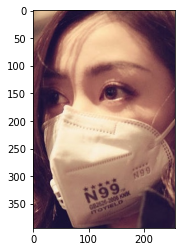

In [168]:
img = cv.imread(folder + "AFDB_masked_face_dataset/aidai/0_0_0.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)